Keras API is the recommended TensorFlow official high-level interface.

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Let’s implement a 2-layer fully-connected (dense) neural network for the MNIST data.

In [2]:
model = Sequential()
model.add(Dense(16, activation="relu", input_dim=28 * 28))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


By default, Keras initializes the weights with the variance scaling technique that we have seen in the last subject. However, we can also manually specify the initializers:

In [3]:
from tensorflow.keras import activations
from tensorflow.keras import initializers

# Create model
model = Sequential()

# Hidden layer
model.add(Dense(units=16, activation=activations.relu, input_dim=28 * 28,
                kernel_initializer=initializers.VarianceScaling(scale=2.0, seed=0)))

# Output layer
model.add(Dense(units=10, activation=activations.softmax,
                kernel_initializer=initializers.VarianceScaling(scale=1.0, seed=0)))

# Print network summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


**Loss function and training operation**

In [4]:
from tensorflow.keras import optimizers

# Define loss function, optimizer and metrics to track during training
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

Keras models provide a compile() function where we can specify the optimizer, the loss function and the metrics to monitor.

In the code from above, we used predefined tokens such as sgd or acc which are good defaults values. Again, we can also have more control over the different parameters by manually defining the objects from the Keras modules:

In [5]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

# Define loss function, optimizer, and metrics to track during training
model.compile(
    optimizer="sgd",                         # .. or optimizers.SGD(lr=0.01)
    loss="sparse_categorical_crossentropy",  # .. or losses.sparse_categorical_crossentropy
    metrics=["acc"],                         # .. or metrics.sparse_categorical_accuracy
)

This code is equivalent to the one from above, but we can now specify the learning rate and the other parameters of the optimizer.

**Load/Split Data**

In [6]:
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

11501568/11490434 [==============================] - 1s 0us/step
Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


In this code, we use the load_data() function from its mnist module which returns 60k-10k train/test splits with the 28x28 grayscale images and the 0-9 numerical labels.

Our dense network works with flat input vectors. So let’s reshape and standardize the data

In [7]:
from sklearn.preprocessing import StandardScaler

# Rescale train and validation data
scaler = StandardScaler()
X_train_preprocessed = scaler.fit_transform(X_train.reshape([-1, 784]).astype(float))
X_test_preprocessed = scaler.transform(X_test.reshape([-1, 784]).astype(float))

print("Train:", X_train_preprocessed.shape)
print("Test:", X_test_preprocessed.shape)

Train: (60000, 784)
Test: (10000, 784)


*StandardScaler() is a great way to scale your data. However, such a scaler might potentially change the value distribution of your features. When working with RGB images which have values in a specific range (i.e. 0 to 255), a simple scaling by / 255. is already enough to bring your data between 0 and 1 (or /127.5 -1 to bring them between -1 and 1).*

**Training**

In [8]:
# Fit model
history = model.fit(
    x=X_train_preprocessed,
    y=y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=25,
    shuffle=True,  # Shuffle training samples
)

Epoch 1/25
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6545 - acc: 0.8110 - val_loss: 0.3310 - val_acc: 0.9060
Epoch 2/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3123 - acc: 0.9095 - val_loss: 0.2701 - val_acc: 0.9205
Epoch 3/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2632 - acc: 0.9230 - val_loss: 0.2468 - val_acc: 0.9283
Epoch 4/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2374 - acc: 0.9295 - val_loss: 0.2332 - val_acc: 0.9323
Epoch 5/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2205 - acc: 0.9347 - val_loss: 0.2243 - val_acc: 0.9345
Epoch 6/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2074 - acc: 0.9386 - val_loss: 0.2168 - val_acc: 0.9369
Epoch 7/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1967 - acc: 0.9419 - val_loss: 0.2112 - val_acc: 0.9394
Epoch 8/25
1500/1500 [==============================] - 2s 1ms

Keras prints the training/validation loss and accuracy metrics that we specified in the metrics=['acc'] argument from the compile() step.

We can access those values via the history object returned by fit()

In [9]:
# The history object saved the scores during training
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

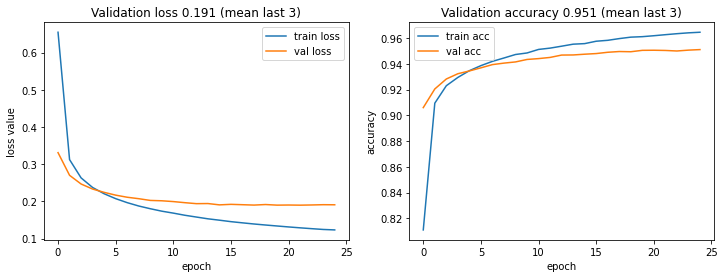

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["acc"], label="train acc")
ax2.plot(history.history["val_acc"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history.history["val_acc"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.show()

We can see that the validation loss and accuracy reach a plateau after 10 epochs. The model then starts overfitting.

**Evaluate test scores**

In [11]:
(test_loss, test_accuracy) = model.evaluate(X_test_preprocessed, y_test, batch_size=32)

print("Test loss: {:.2f}".format(test_loss))
print("Test accuracy: {:.2f}%".format(100 * test_accuracy))

313/313 [==============================] - 1s 1ms/step - loss: 0.1899 - acc: 0.9486
Test loss: 0.19
Test accuracy: 94.86%


**Visualize weights**

In [13]:
model.layers

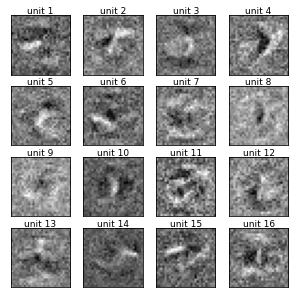

In [14]:
# Retrieve first hidden layer
hidden = model.layers[0]

# Get weights/biases
weights_hidden, biases_hidden = hidden.get_weights()

# Create figure with 16 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(5, 5))

# Plot the weights of the 16 hidden units
for i, axis in enumerate(axes.flatten()):
    # Get weights of i-th hidden unit
    weights = weights_hidden[:, i]

    # Reshape into 28 by 28 array
    weights = weights.reshape(28, 28)

    # Plot weights
    axis.set_title("unit {}".format(i + 1), size=9, pad=2)
    axis.imshow(weights, cmap=plt.cm.gray_r)  # Grayscale
    axis.get_xaxis().set_visible(False)       # Disable x-axis
    axis.get_yaxis().set_visible(False)       # Disable y-axis

plt.show()

*Try with dropout by adding tf.keras.layers.Dropout(x) layers to the Sequential model. Also try with regularization by setting the kernel_regularizer=tf.keras.regularizers.l2(x) parameters from Dense layers.*

**Keras Image Generators**

The first step is to create an ImageDataGenerator which specifies how to process each image. In our case, we will simply apply 0-1 rescaling to all images and additional data augmentation to the train set to increase the size of the dataset and add some variation.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create image generator
train_generator = ImageDataGenerator(
    rescale=1 / 255, horizontal_flip=True, rotation_range=5, validation_split=0.2
)
test_generator = ImageDataGenerator(rescale=1. / 255)

We use the rescale parameter to normalize the images between zero and one, and the horizontal_flip and rotation_range transformations to get slightly different variants of the images each time we sample from the images to fight overfitting and virtually augment the dataset to improve training. This is why we only use those parameters for the train_generator and not the test_generator one. Optionally, we can also keep a fraction of the data for validation. In this case, we keep 20% of the data as a validation set. Note that they will also go through the training transformations.

The second step is to create an iterator that iterates over the directory of CIFAR-10 .png images. To iterate over the directory we can use the flow_from_directory() function from our image generators which takes the path to the directory, the batch size and the target size. This can be useful if we need to resize the images before inserting them into our network. However, in our case, we will keep the 32x32 .png images and set target_size=(32, 32).

In [17]:
!tree /A cifar10

Folder PATH listing
Volume serial number is 000000F3 143B:98D1
C:\USERS\ROB\CIFAR10
+---test
|   +---airplane
|   +---automobile
|   +---bird
|   +---cat
|   +---deer
|   +---dog
|   +---frog
|   +---horse
|   +---ship
|   \---truck
\---train
    +---airplane
    +---automobile
    +---bird
    +---cat
    +---deer
    +---dog
    +---frog
    +---horse
    +---ship
    \---truck


In [18]:
import os

# Train, validation and test sets
trainset = train_generator.flow_from_directory(
    os.path.join("cifar10", "train"),
    batch_size=32,
    target_size=(32, 32),
    shuffle=True,
    subset="training",
)
validset = train_generator.flow_from_directory(
    os.path.join("cifar10", "train"),
    batch_size=32,
    target_size=(32, 32),
    shuffle=False,
    subset="validation",
)
testset = test_generator.flow_from_directory(
    os.path.join("cifar10", "test"), batch_size=32, target_size=(32, 32), shuffle=False
)

Found 4000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [20]:
# view which images assigned to each dataset
trainset.filenames[:5]

['airplane\\airplane-101.png',
 'airplane\\airplane-102.png',
 'airplane\\airplane-103.png',
 'airplane\\airplane-104.png',
 'airplane\\airplane-105.png']

In [21]:
validset.filenames[:4]

['airplane\\airplane-001.png',
 'airplane\\airplane-002.png',
 'airplane\\airplane-003.png',
 'airplane\\airplane-004.png']

As we can see, for each class the first 100 images (1000 validation images/10 class) were assigned to the validation set and the rest to the training one. We can verify that those two sets don’t intersect with

In [22]:
set(trainset.filenames).intersection(set(validset.filenames))

set()

The directory iterators can be used like normal Python iterators, for example in a for loop. By calling next(), we get the next batch of images with their labels.

In [23]:
batch_imgs, batch_labels = trainset.next()

print("Batch images:", batch_imgs.shape)
print("Batch labels:", batch_labels.shape)

Batch images: (32, 32, 32, 3)
Batch labels: (32, 10)


It’s important to note that the iterator returns one-hot encoded labels by default. In our case, we have 10 classes, so batch_label is a 32 x 10 array.

In [24]:
batch_labels[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [25]:
trainset.class_indices

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

*Note that it is possible to obtain integer encoded labels with the iterator. To do that, one can change the default parameter class_mode = 'categorical' in flow_from_directory() function to class_mode = 'sparse'.*

**Training with generators**

In [26]:
import tensorflow.keras as keras

# Convolutional Network
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=2, activation="relu",
                              input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=trainset.num_classes, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 44,362
Trainable params: 44,362
Non-trainable params: 0
__________________________________________________

Let’s compile the model with the Adam optimizer and the categorical_crossentropy loss function which is equivalent to the sparse_categorical_crossentropy one from the last unit, but works with one-hot encoded labels.

In [27]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=["acc"])

Let’s also create an optional EarlyStopping callback that we can use during the model fitting process. Callbacks are functions that can be applied at different stages of the training procedures. In our case, EarlyStopping will monitor the loss value on the validation set and stop the training once this loss value didn’t improve anymore for more than 6 epochs. Early stopping is a common way to fight overfitting.

In [30]:
# End training when accuracy stops improving (optional)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=6)

In [31]:
# Train model
history = model.fit(
    trainset, validation_data=validset, epochs=100, callbacks=[early_stopping]
)

Epoch 1/100
125/125 [==============================] - 37s 295ms/step - loss: 2.2100 - acc: 0.1660 - val_loss: 2.0497 - val_acc: 0.2490
Epoch 2/100
125/125 [==============================] - 6s 46ms/step - loss: 1.9606 - acc: 0.2878 - val_loss: 1.8534 - val_acc: 0.3400
Epoch 3/100
125/125 [==============================] - 6s 46ms/step - loss: 1.7871 - acc: 0.3575 - val_loss: 1.6910 - val_acc: 0.3880
Epoch 4/100
125/125 [==============================] - 6s 46ms/step - loss: 1.6977 - acc: 0.3915 - val_loss: 1.6114 - val_acc: 0.4170
Epoch 5/100
125/125 [==============================] - 6s 46ms/step - loss: 1.6010 - acc: 0.4302 - val_loss: 1.6526 - val_acc: 0.4050
Epoch 6/100
125/125 [==============================] - 6s 46ms/step - loss: 1.5595 - acc: 0.4448 - val_loss: 1.5880 - val_acc: 0.4250
Epoch 7/100
125/125 [==============================] - 6s 48ms/step - loss: 1.5103 - acc: 0.4535 - val_loss: 1.5634 - val_acc: 0.4270
Epoch 8/100
125/125 [==============================] - 6s 46

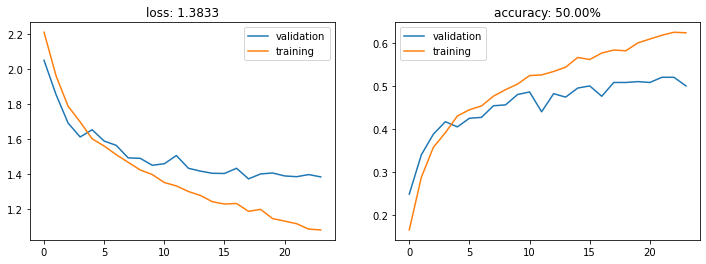

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot loss values
ax1.set_title("loss: {:.4f}".format(history.history["val_loss"][-1]))
ax1.plot(history.history["val_loss"], label="validation")
ax1.plot(history.history["loss"], label="training")
ax1.legend()

# plot accuracy values
ax2.set_title("accuracy: {:.2f}%".format(history.history["val_acc"][-1] * 100))
ax2.plot(history.history["val_acc"], label="validation")
ax2.plot(history.history["acc"], label="training")
ax2.legend()

plt.show()

**Predictions and final test estimations**

In [33]:
test_preds = model.predict(testset)
print("Predictions:", test_preds.shape)

Predictions: (1000, 10)


In [34]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Compute confusion matrix
matrix = confusion_matrix(
    y_true=testset.classes,            # array with true labels
    y_pred=test_preds.argmax(axis=1),  # array with predicted labels
)

# Format as a DataFrame
class_names = list(testset.class_indices.keys())
matrix_df = pd.DataFrame(data=matrix, columns=class_names, index=class_names)
matrix_df.columns.name = "Predictions"
matrix_df.index.name = "True class"
matrix_df

Predictions,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
True class,,,,,,,,,,
airplane,55,4,3,4,3,3,5,7,7,9
automobile,6,58,1,0,1,2,3,4,2,23
bird,12,1,33,6,13,17,12,2,2,2
cat,3,4,9,14,11,29,19,9,0,2
deer,5,1,7,2,34,16,12,18,2,3
dog,0,1,11,12,1,51,10,10,1,3
frog,3,1,5,3,6,9,70,1,0,2
horse,1,0,3,3,6,17,1,65,1,3
ship,33,8,0,0,1,6,2,2,39,9


In [35]:
test_loss, test_acurracy = model.evaluate(testset)
print("Test loss: {:.2f}, accuracy: {:.2f}%".format(test_loss, test_acurracy * 100))
# Output varies with an accuracy score around 52% and a loss around 1.4

32/32 [==============================] - 1s 19ms/step - loss: 1.4676 - acc: 0.4950
Test loss: 1.47, accuracy: 49.50%


**Keras pretrained model**

In [36]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K

avoid cluttering by manually resetting all the states with K.clear_session()

In [37]:
K.clear_session()  # Reset state generated by Keras (avoid clutter)

In [38]:
# import model
model = keras.applications.Xception(weights="imagenet")

91897856/91884032 [==============================] - 11s 0us/step


Loading both network architecture and pretrained parameters.

In [39]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

*Sample image predictions*

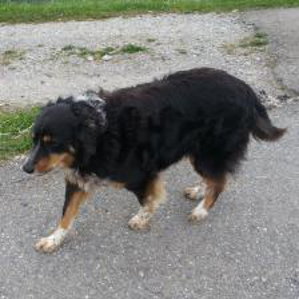

In [41]:
%matplotlib inline
import PIL.Image as Image
from IPython.display import display

img = Image.open("c4_photo.jpg").resize(size=[299, 299])
display(img)

In [42]:
import numpy as np

img_batch = np.array(img)[np.newaxis, :, :, :]
print("Batch size:", img_batch.shape)
print("Data type:", img_batch.dtype)

Batch size: (1, 299, 299, 3)
Data type: uint8


In [43]:
predictions = model.predict(2*(img_batch-127.5)/255)
predictions.shape

(1, 1000)

In [45]:
print(predictions[0, :5])

[0.00026001 0.00031556 0.0006608  0.00044154 0.00019407]


In [46]:
from tensorflow.keras.applications.xception import decode_predictions

decode_predictions(predictions, top=5)

49152/35363 [=========================================] - 0s 0us/step


[[('n02107683', 'Bernese_mountain_dog', 0.25143307),
  ('n02107908', 'Appenzeller', 0.06188091),
  ('n02108551', 'Tibetan_mastiff', 0.049254645),
  ('n02106030', 'collie', 0.0479649),
  ('n02106166', 'Border_collie', 0.040270135)]]

*Save and load models with help of h5 files*

In [48]:
model.compile(optimizer='sgd', loss='categorical_crossentropy')

model.save("model.h5")  # Saves architecture and weights

In [50]:
K.clear_session()  # Reset state generated by Keras to avoid clutter
new_model = keras.models.load_model("model.h5", compile=False)  # Load model

# New predictions
decode_predictions(new_model.predict(2*(img_batch-127.5)/255))

[[('n02107683', 'Bernese_mountain_dog', 0.25143307),
  ('n02107908', 'Appenzeller', 0.06188091),
  ('n02108551', 'Tibetan_mastiff', 0.049254645),
  ('n02106030', 'collie', 0.0479649),
  ('n02106166', 'Border_collie', 0.040270135)]]